In [1]:
from tensor_fusion.net import ARF
import torch


input_sizes = (300, 5, 20)
hidden_sizes = (128, 32, 32)
fusion_size = 128
out_size = 1
dropouts = (0, 0, 0, 0, 0)
device = 'cuda'
dtype = torch.float32

model = ARF(input_sizes, hidden_sizes, fusion_size, 200, out_size, dropouts, device=device, dtype=dtype)

/home/christian_lee/anaconda3/envs/tensor_fusion/lib/python3.8/site-packages/tltorch/factorized_tensors/core.py:145: UserWarning: Creating a subclass of FactorizedTensor TensorizedTensor with no name.
  warnings.warn(f'Creating a subclass of FactorizedTensor {cls.__name__} with no name.')


In [2]:
from tensor_fusion.dataset import get_cmu_mosi_dataset

train_set, valid_set, test_set = get_cmu_mosi_dataset(binary=True, device=device, dtype=dtype)
#train_set = torch.utils.data.Subset(train_set, list(range(1000)))

In [3]:
from tensor_fusion.train import binary_map_train_ARF

coeff = 1e-1
lr = 1e-2
_, result = binary_map_train_ARF(model, train_set, test_set, coeff, lr, print_result=True)

Epoch 0
Train Loss 1858.7388
Valid Loss 0.7012
Test Bin Acc. 0.4038
Current Rank Est. 200
Epoch 1
Train Loss 274842376460396704.0000
Valid Loss 0.7020
Test Bin Acc. 0.4038
Current Rank Est. 191
Epoch 2
Train Loss 205600236459460160.0000
Valid Loss 0.6244
Test Bin Acc. 0.7143
Current Rank Est. 166
Epoch 3
Train Loss 170980132329044032.0000
Valid Loss 0.5742
Test Bin Acc. 0.7391
Current Rank Est. 157
Epoch 4
Train Loss 296168171813687616.0000
Valid Loss 0.5183
Test Bin Acc. 0.7668
Current Rank Est. 154
Epoch 5
Train Loss 436645241950383040.0000
Valid Loss 0.5596
Test Bin Acc. 0.7332
Current Rank Est. 142
Epoch 6
Train Loss 269881683995755296.0000
Valid Loss 0.6789
Test Bin Acc. 0.7493
Current Rank Est. 134
Epoch     8: reducing learning rate of group 0 to 5.0000e-05.
Epoch     8: reducing learning rate of group 1 to 1.0000e-03.
Epoch 7
Train Loss 378247455342380992.0000
Valid Loss 0.5517
Test Bin Acc. 0.7493
Current Rank Est. 125
Epoch 8
Train Loss 138086716635655888.0000
Valid Loss 0.58

In [4]:
import matplotlib.pyplot as plt

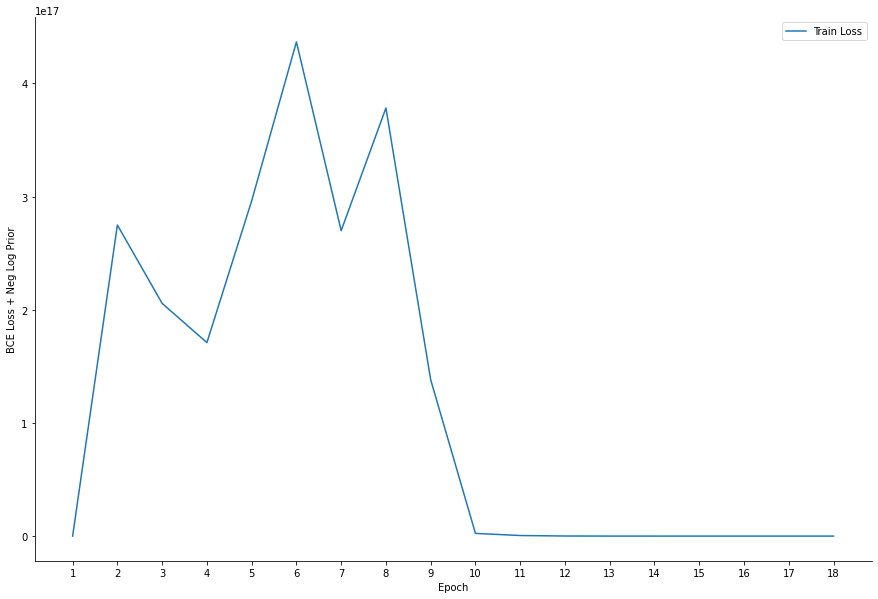

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
x = list(range(1,len(result['train_loss'])))
ax.plot(x, result['train_loss'][1:], label='Train Loss')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('BCE Loss + Neg Log Prior')
ax.legend()
#plt.savefig('train_train_loss.jpg')
plt.show()

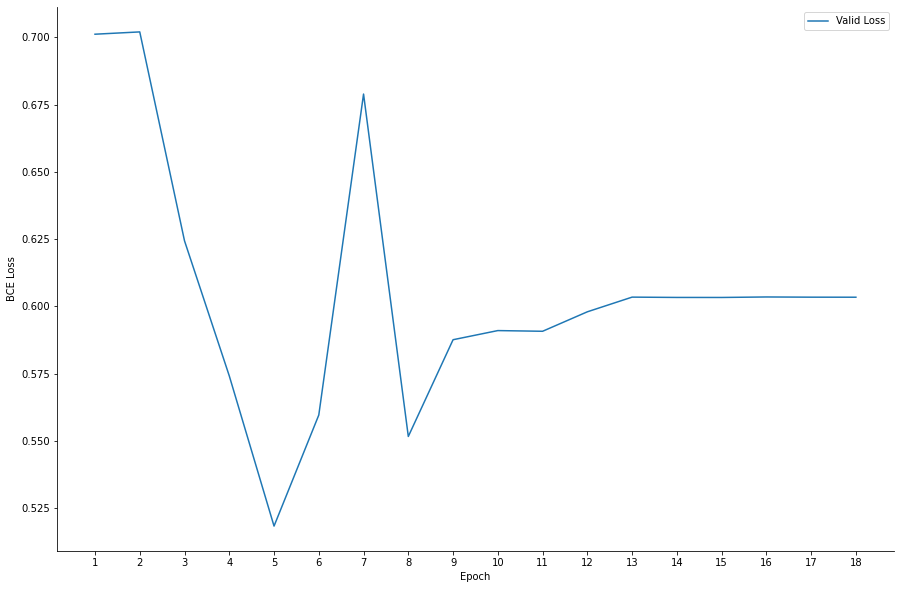

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, result['valid_loss'][1:], label='Valid Loss')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('BCE Loss')
ax.legend()
#plt.savefig('train_valid_loss.jpg')
plt.show()

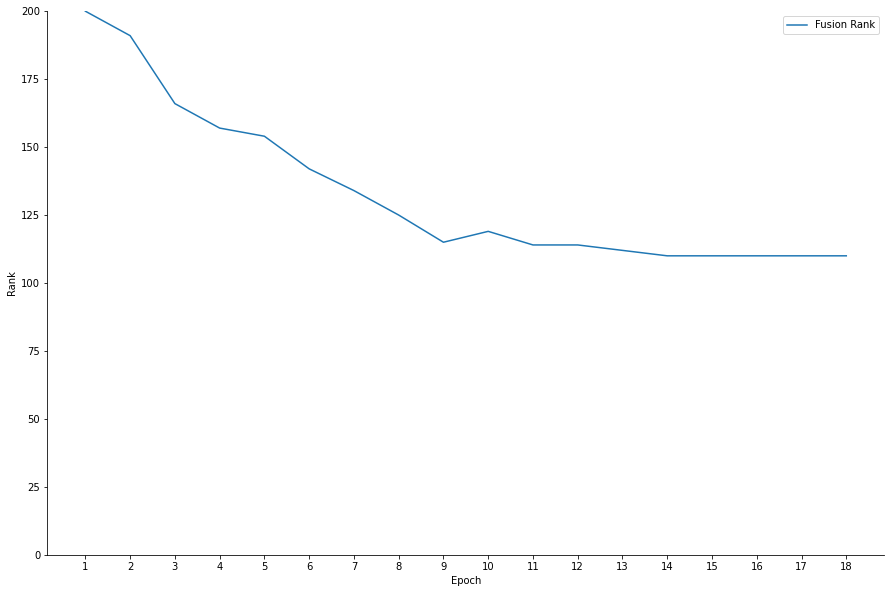

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, result['rank'], label='Fusion Rank')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.annotate(str(result['rank'][2]), xy=(3, result['rank'][2]), xytext=(3.5, result['rank'][2]))
#ax.annotate(str(result['rank'][3]), xy=(4, result['rank'][3]), xytext=(4.5, result['rank'][3]))
#ax.annotate(str(result['rank'][4]), xy=(5, result['rank'][4]), xytext=(5.5, result['rank'][4]))
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('Rank')
ax.legend()
ax.set_ylim(0, 200)
#plt.savefig('train_rank.jpg')
plt.show()

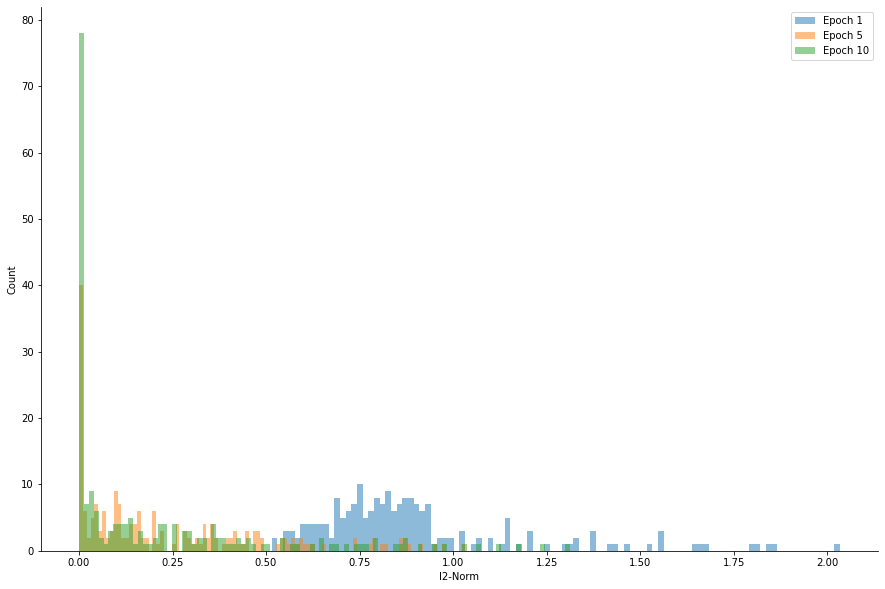

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(result['norms'][0], 100, alpha=0.5, label='Epoch 1')
ax.hist(result['norms'][4], 100, alpha=0.5, label='Epoch 5')
ax.hist(result['norms'][9], 100, alpha=0.5, label='Epoch 10')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('l2-Norm')
ax.set_ylabel('Count')
#plt.savefig('train_avg_col_norm_hist.jpg')
plt.show()

In [9]:
print('Model Parameters before compression: {}'.format(model.count_parameters()))
print('Fusion Parameters before compression: {}'.format(model.count_fusion_parameters()))

Model Parameters before compression: 339841
Fusion Parameters before compression: 64928


In [10]:
model.compress()

In [11]:
print('Model Parameters after compression: {}'.format(model.count_parameters()))
print('Fusion Parameters after compression: {}'.format(model.count_fusion_parameters()))

Model Parameters after compression: 311005
Fusion Parameters after compression: 36092
